<a href="https://colab.research.google.com/github/VeronicaIovchik/Heartbeat_classification_challenge_final_project/blob/main/EDA_heart_rate_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA

#Load main libraries

In [ ]:
# generals
import os
import shutil
import pandas as pd
import numpy as np

# plots
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#audio
import IPython.display as ipd
import librosa
import soundfile as sf


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/Project/DATA_2

Mounted at /content/drive
/content/drive/MyDrive/Project/DATA_2


#Data extraction and arrangement
❗ run only for the first time ❗

In [ ]:
# Function to remove __MACOSX folder
def remove_macosx_folder(folder):
    macosx_folder = os.path.join(folder, '__MACOSX')
    if os.path.exists(macosx_folder):
        shutil.rmtree(macosx_folder)

# Function to add folder name to audio files and move them
def add_folder_name_and_move(main_folder):
    folder_name = os.path.basename(main_folder)
    for root, dirs, files in os.walk(main_folder):
        for file in files:
            if file.endswith('.wav'):
                audio_file = os.path.join(root, file)
                new_file_name = folder_name + '_' + file
                new_file_path = os.path.join(main_folder, new_file_name)
                shutil.move(audio_file, new_file_path)

# Function to process a single folder
def process_folder(folder_path):
    remove_macosx_folder(folder_path)
    add_folder_name_and_move(folder_path)
    subfolders = [name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]
    for subfolder in subfolders:
        subfolder_path = os.path.join(folder_path, subfolder)
        add_folder_name_and_move(subfolder_path)
        shutil.rmtree(subfolder_path)

# Main function to process datasets
def process_dataset(dataset_folder):
    for folder in os.listdir(dataset_folder):
        folder_path = os.path.join(dataset_folder, folder)
        if os.path.isdir(folder_path):
            process_folder(folder_path)



In [ ]:
dataset_a_folder = '/content/drive/MyDrive/Project/DATA_2/set_A'
dataset_b_folder = '/content/drive/MyDrive/Project/DATA_2/set_B'

# process_dataset(dataset_a_folder)
# process_dataset(dataset_b_folder)

## turn to df

In [ ]:
#A
data_path =  '/content/drive/MyDrive/Project/DATA_2/set_A'
train_data      = data_path
A_unlabel_data    = data_path  + "/Aunlabelledtest/"

A_normal_data     = train_data + '/Atraining_normal/'
A_murmur_data     = train_data + '/Atraining_murmur/'
A_artifact_data   = train_data + '/Atraining_artifact/'
A_extrahls_data   = train_data + "/Atraining_extrahs/"

In [ ]:
# print("A Dataset:")
# print("Normal files:", len(os.listdir(A_normal_data))) #length of normal training sounds
# print("Murmur files:",len(os.listdir(A_murmur_data))) #length of murmur training sounds
# print("Artifact files:",len(os.listdir(A_artifact_data))) #length of artifact training sounds
# print("Extrahls files:",len(os.listdir(A_extrahls_data))) #length of extrahls training sounds

print("Dateset A:")
print('TOTAL TRAIN SOUNDS:', len(os.listdir(A_normal_data))
                              + len(os.listdir(A_murmur_data))
                              + len(os.listdir(A_artifact_data))
                              + len(os.listdir(A_extrahls_data)))

print("TOTAL TEST SOUNDS: ", len(os.listdir(A_unlabel_data)))

Dateset A:
TOTAL TRAIN SOUNDS: 124
TOTAL TEST SOUNDS:  52


In [ ]:
#dateset A to df
labels = np.array(['normal','murmur','artifact','extrahls']) #,'extrastole'
counts = np.array([len(os.listdir(A_normal_data)),
              len(os.listdir(A_murmur_data)),
              # len(os.listdir(A_extrastole_data)),
              len(os.listdir(A_artifact_data)),
              len(os.listdir(A_extrahls_data))])

df_train_data_A = pd.DataFrame({'labels':labels, 'value':counts})
df_train_data_A

labels  value
0    normal     31
1    murmur     34
2  artifact     40
3  extrahls     19

In [ ]:
#B
data_path =  '/content/drive/MyDrive/Project/DATA_2/set_B'
train_data      = data_path
B_unlabel_data    = data_path  + "/Bunlabelledtest/"

B_normal_data     = train_data + '/Btraining_normal/'
B_murmur_data     = train_data + '/Btraining_murmur/'
B_extrastole_data = train_data + '/Btraining_extrasystole/'

In [ ]:
# print("B Dataset:")
# print("Normal files:", len(os.listdir(B_normal_data))) #length of normal training sounds
# print("Murmur files:",len(os.listdir(B_murmur_data))) #length of murmur training sounds
# print("Extrastole files", len(os.listdir(B_extrastole_data))) #length of extrastole training sounds

print("Dateset B:")
print('TOTAL TRAIN SOUNDS:', len(os.listdir(B_normal_data))
                          + len(os.listdir(B_murmur_data))
                          + len(os.listdir(B_extrastole_data)))

print("TOTAL TEST SOUNDS: ", len(os.listdir(B_unlabel_data)))

Dateset B:
TOTAL TRAIN SOUNDS: 458
TOTAL TEST SOUNDS:  195


In [ ]:
#dateset B to df
labels = np.array(['normal','murmur','extrastole'])
counts = np.array([len(os.listdir(B_normal_data)),
              len(os.listdir(B_murmur_data)),
              len(os.listdir(B_extrastole_data))])

df_train_data_B = pd.DataFrame({'labels':labels, 'value':counts})
df_train_data_B

labels  value
0      normal    319
1      murmur     93
2  extrastole     46

Merge the 2 df:

In [ ]:
df_train_AB= pd.merge(df_train_data_A, df_train_data_B, on='labels', how='outer',suffixes=('_SetA', '_SetB'))

In [ ]:
df_train_AB['sum'] = df_train_AB.sum(axis=1)
df_train_AB= df_train_AB.fillna(0)
df_train_AB

<ipython-input-64-82b17f28fbcc>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train_AB['sum'] = df_train_AB.sum(axis=1)


labels  value_SetA  value_SetB    sum
0      normal        31.0       319.0  350.0
1      murmur        34.0        93.0  127.0
2    artifact        40.0         0.0   40.0
3    extrahls        19.0         0.0   19.0
4  extrastole         0.0        46.0   46.0

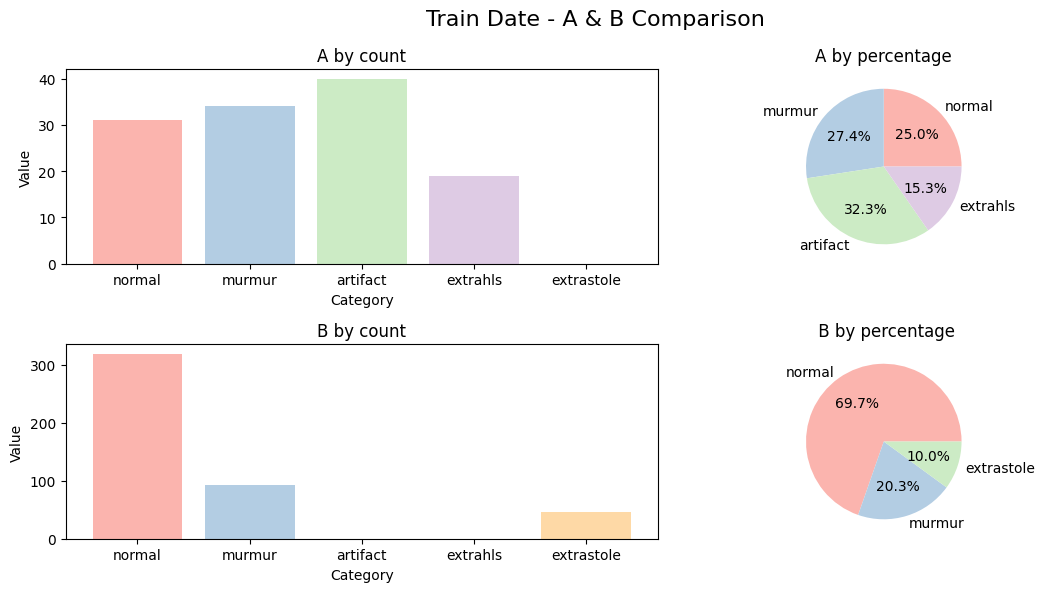

In [ ]:
# Comparison between A & B dist
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
cmap = mpl.color_sequences['Pastel1']
cmap = mpl.color_sequences['Pastel1']

#A Bar plot
axs[0][0].bar(df_train_AB['labels'],df_train_AB['value_SetA'], color=cmap)
axs[0][0].set_xlabel('Category')
axs[0][0].set_ylabel('Value')
axs[0][0].set_title('A by count')

#A Pie chart
axs[0][1].pie(df_train_data_A['value'], labels=df_train_data_A['labels'], autopct='%1.1f%%', colors=cmap)
axs[0][1].set_title('A by percentage')


#B Bar plot
axs[1][0].bar(df_train_AB['labels'],df_train_AB['value_SetB'], color=cmap)
axs[1][0].set_xlabel('Category')
axs[1][0].set_ylabel('Value')
axs[1][0].set_title('B by count')

#B Pie chart
axs[1][1].pie(df_train_data_B['value'], labels=df_train_data_B['labels'], autopct='%1.1f%%', colors=cmap)
axs[1][1].set_title(' B by percentage')


fig.suptitle('Train Date - A & B Comparison', fontsize=16)

# Show the figure
plt.tight_layout()
plt.show()

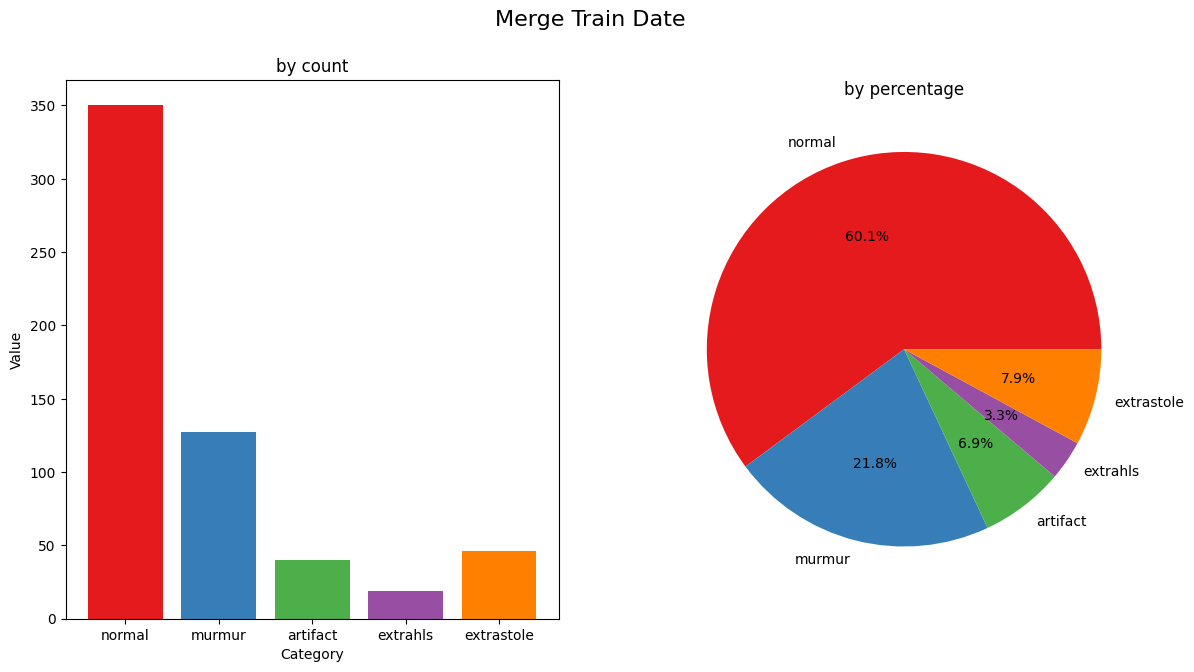

In [ ]:
# Distribution of labels in the data
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
cmap = mpl.color_sequences['Set2']

# Bar plot
axs[0].bar(df_train_AB['labels'],df_train_AB['sum'], color=cmap)
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Value')
axs[0].set_title('by count')

# Pie chart
axs[1].pie(df_train_AB['sum'], labels=df_train_AB['labels'], autopct='%1.1f%%', colors=cmap)
axs[1].set_title('by percentage')

fig.suptitle('Merge Train Date', fontsize=16)

# Show the figure
plt.show()

#folders into to csv info file, run only for the first time <br>
❗ run only for the first time ❗

In [ ]:
def create_dfs_by_type(folder_path):
    folder_df = []
    columns = ['filename', 'path', 'Duration', 'Channels', 'Sample Rate', 'Bit Rate']

    for filename in os.listdir(folder_path):
        if filename.endswith('.wav'):
            file_path = os.path.join(folder_path, filename)
            info = mediainfo(file_path)
            file_info = {
                'filename': filename,
                'path': folder_path,
                'Duration': info['duration'],
                'Channels': info['channels'],
                'Sample Rate': info['sample_rate'],
                'Bit Rate': info['bit_rate']
            }
            folder_df.append(file_info)

    df = pd.DataFrame(folder_df, columns=columns)

    return df

In [ ]:
def save_to_csv(df, file_name):
  #check if folder path exists
  if not os.path.exists('/content/drive/MyDrive/Project/info_csv_by_folder'):
    os.makedirs('/content/drive/MyDrive/Project/info_csv_by_folder')

  folder_path = '/content/drive/MyDrive/Project/info_csv_by_folder'

  file_path_save = os.path.join(folder_path, file_name)
  #print(file_path_save)

  # Check if the directory exists, if not, create it
  directory = os.path.dirname(file_path_save)
  if not os.path.exists(directory):
    os.makedirs(directory)

  # Check if the file exists, if yes, add a suffix to the filename
  if os.path.exists(file_path_save):
    file_name, extension = os.path.splitext(file_name)
    file_name = file_name + '_new' + extension
    file_path_save = os.path.join(directory, file_name)

  df.to_csv(file_path_save, index=False)

In [ ]:
def process_folders(path):


    # Split the folder path into two parts: parent directory and folder name
    parent_dir, folder_name = os.path.split(path)

    # Split the parent directory into two parts: grandparent directory and parent folder name
    grandparent_dir, parent_folder_name = os.path.split(parent_dir)

    # Create the file name by combining the parent folder name and folder name
    file_name = parent_folder_name + '_' + folder_name

    if os.path.isdir(path):

      df = create_dfs_by_type(path)
      file_name = f"{file_name}.csv"
      print(file_name)
      save_to_csv(df,file_name)

In [ ]:
for i in os.listdir('/content/drive/MyDrive/Project/DATA_2'):
  folder_path = os.path.join('/content/drive/MyDrive/Project/DATA_2', i)
  for j in os.listdir(folder_path):
    path_to_go = os.path.join(folder_path, j)
    print(path_to_go)
    process_folders(path_to_go)

/content/drive/MyDrive/Project/DATA_2/set_A/Atraining_normal


NameError: ignored

#Histograms

In [ ]:
def create_hists(folder_path, csv_file):
  # Read the CSV file into a pandas DataFrame
  df = pd.read_csv(folder_path+'/'+csv_file)

  # Get the column names
  columns = df.columns[2:] #['Duration', 'Channels', 'Sample Rate', 'Bit Rate']

  # Determine the number of rows&columns in the grid
  num_cols = 4
  num_rows = 1

  # Create a figure and axes for the subplots
  fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 4))
  colors = mpl.colormaps['Set2']

  # Iterate over each column in the DataFrame
  for i, column in enumerate(columns):
      fig.suptitle(csv_file[:-4].capitalize() + " Distributions", fontsize=16)
      # Select the appropriate subplot
      ax = axs[i]

      # Create a histogram for the current column in the current subplot
      #ax.hist(df[column], bins='auto', color = colors(i) ,alpha = 0.7)
      counts, bins, patches = ax.hist(df[column], bins=30, color=colors(i))

      # Set labels and title for the histogram
      ax.set_xlabel(column)
      ax.set_ylabel('Counts')
      ax.set_title(column + ' Histogram')
      ax.grid(True)

  # Adjust the spacing between subplots
  fig.tight_layout()

  # Show the figure
  plt.show()

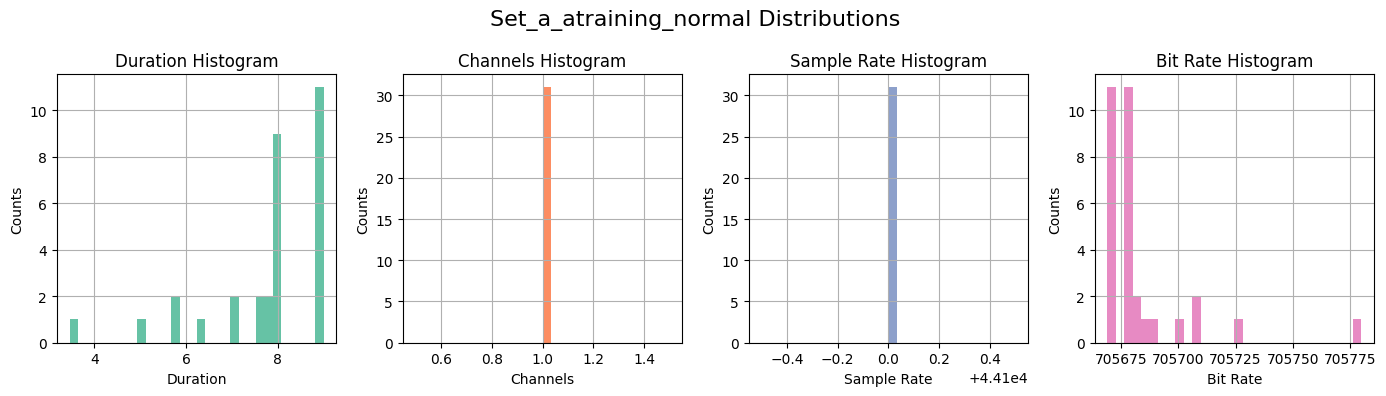

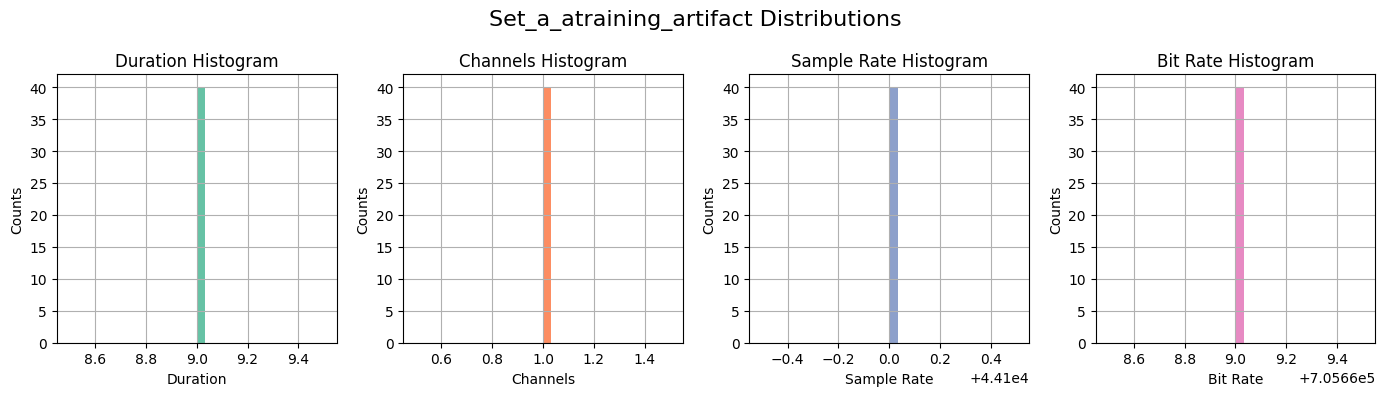

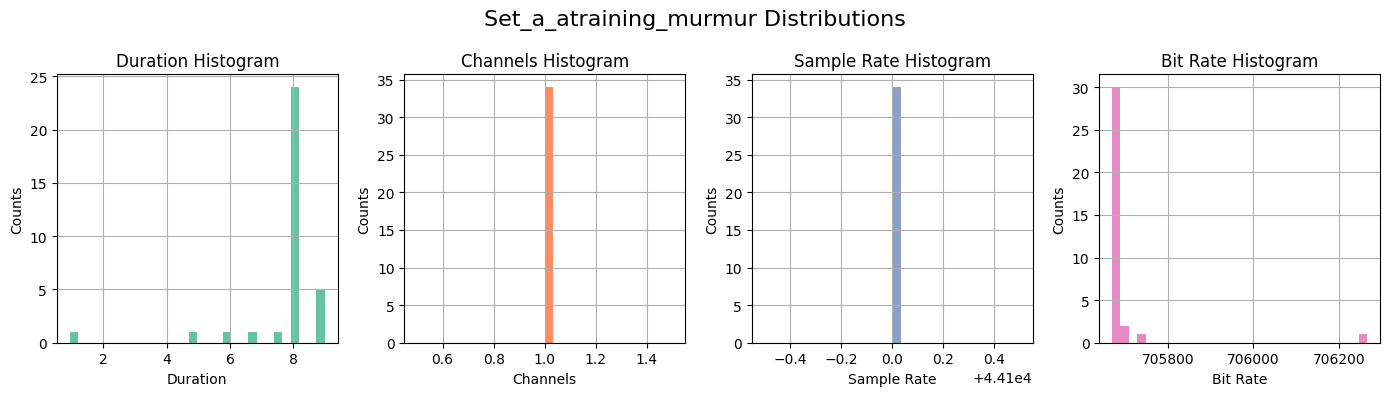

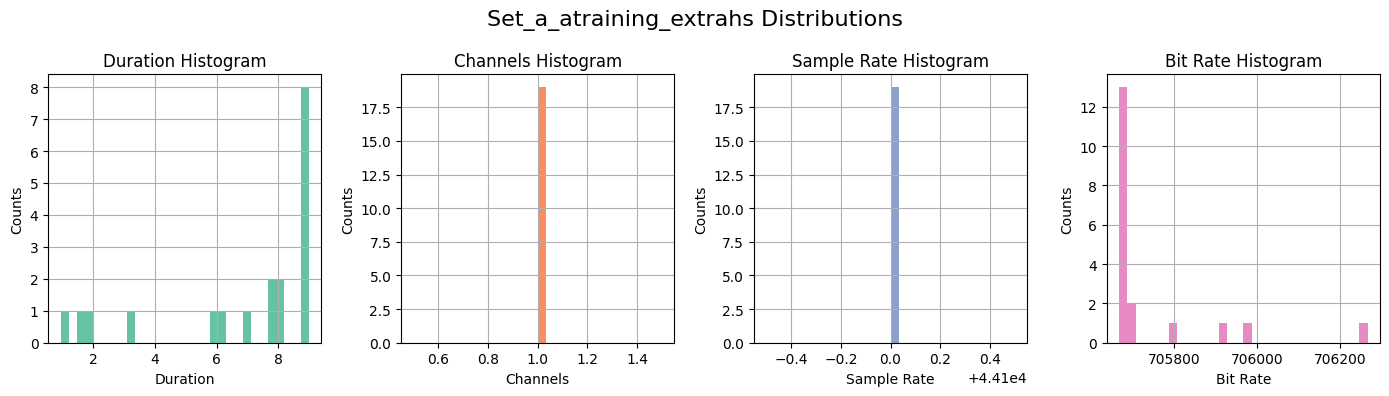

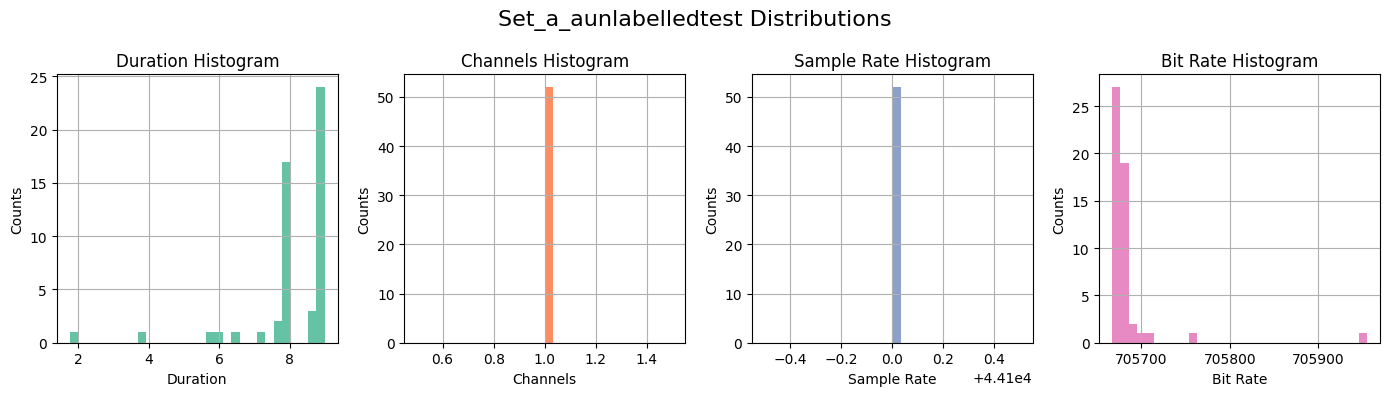

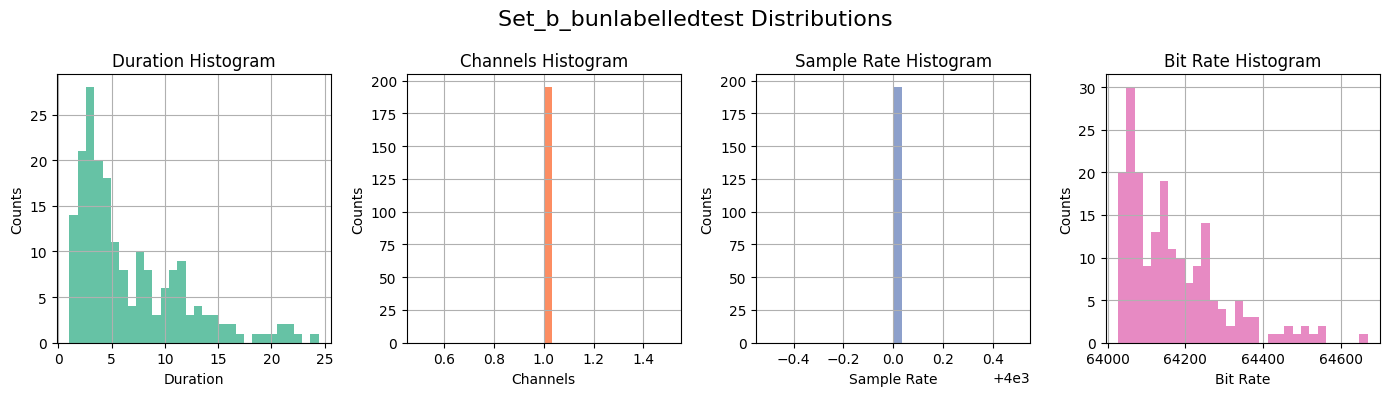

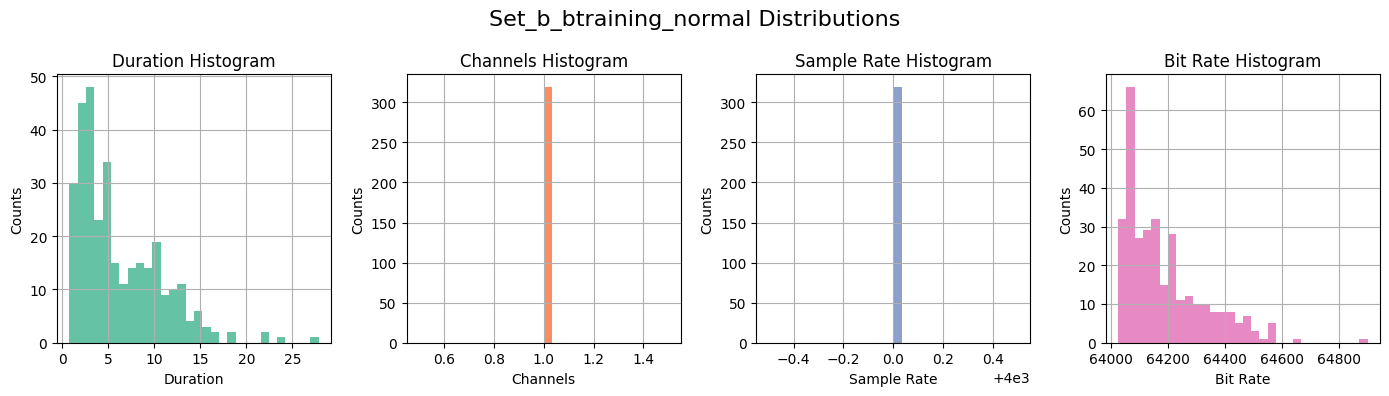

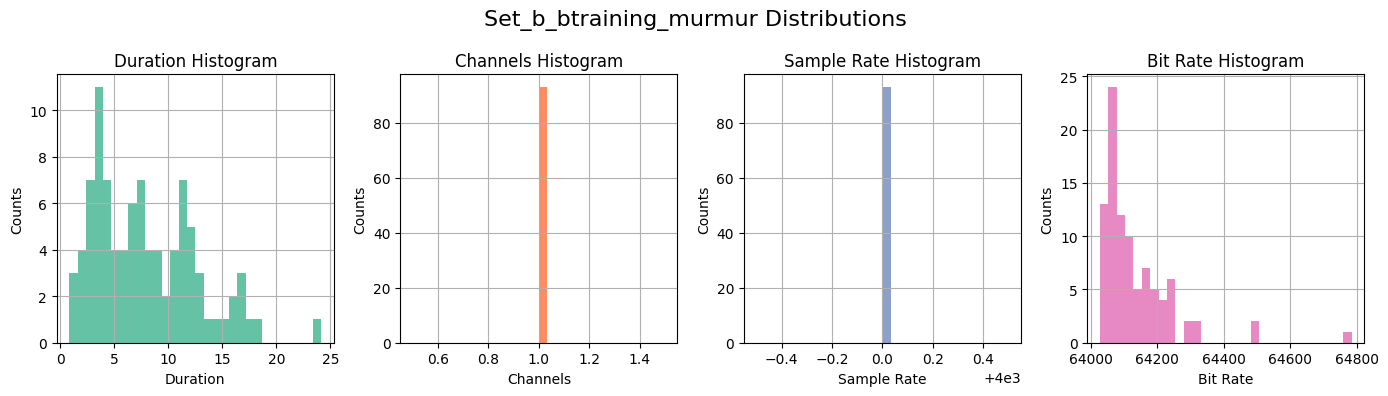

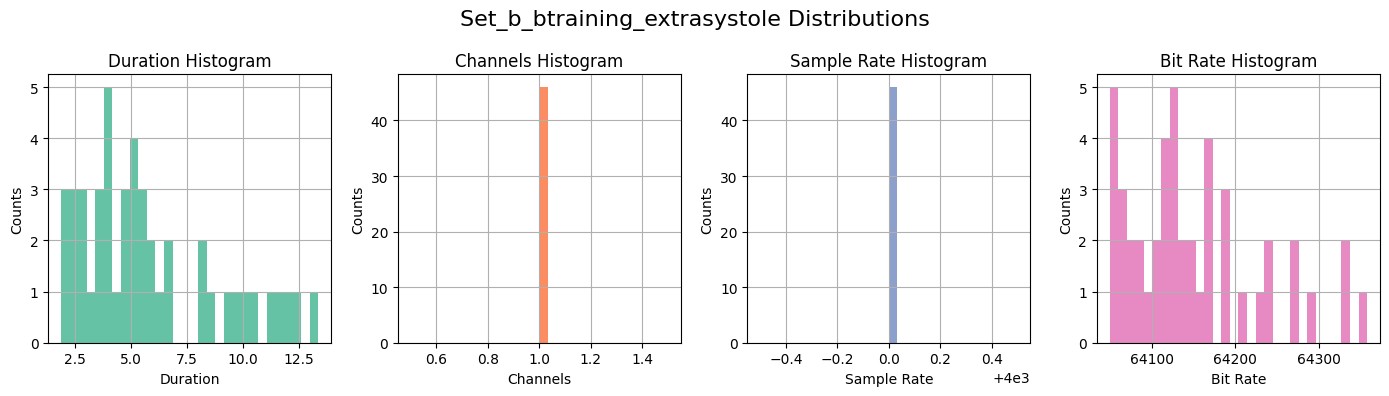

In [ ]:
folder_path = "/content/drive/MyDrive/Project/info_csv_by_folder"
csv_files = [file for file in os.listdir(folder_path)]

for file in csv_files:
  create_hists(folder_path, file)

In [ ]:
for file in csv_files:
  df = pd.read_csv(folder_path+'/'+ file)
  print(file[:-4].capitalize()+":")
  print(df.describe())
  print(" ")


Set_a_atraining_normal:
        Duration  Channels  Sample Rate       Bit Rate
count  31.000000      31.0         31.0      31.000000
mean    7.803954       1.0      44100.0  705683.064516
std     1.343867       0.0          0.0      22.399309
min     3.463424       1.0      44100.0  705669.000000
25%     7.587744       1.0      44100.0  705669.000000
50%     7.947075       1.0      44100.0  705678.000000
75%     9.000000       1.0      44100.0  705681.500000
max     9.000000       1.0      44100.0  705780.000000
 
Set_a_atraining_artifact:
       Duration  Channels  Sample Rate  Bit Rate
count      40.0      40.0         40.0      40.0
mean        9.0       1.0      44100.0  705669.0
std         0.0       0.0          0.0       0.0
min         9.0       1.0      44100.0  705669.0
25%         9.0       1.0      44100.0  705669.0
50%         9.0       1.0      44100.0  705669.0
75%         9.0       1.0      44100.0  705669.0
max         9.0       1.0      44100.0  705669.0
 
Set_a_atra

In [ ]:
for item in os.listdir('/content/drive/MyDrive/Project/DATA_2/set_A'):
  print(item)
for item in os.listdir('/content/drive/MyDrive/Project/DATA_2/set_B'):
  print(item)

Atraining_normal
Atraining_artifact
Atraining_murmur
Atraining_extrahs
Aunlabelledtest
Bunlabelledtest
Btraining_normal
Btraining_murmur
Btraining_extrasystole


#Exploring the Audio

##Functuons

Load an audio file:

In [ ]:
# Listen to random audio from specific class
def random_sound(audio_class):
    #class_name = str(audio_class)
    #random_sound = np.random.randint(0,len(os.listdir(audio_class)))
    random_sound = 0
    sound = os.listdir(audio_class)[random_sound]
    sound_path = audio_class + '/' + sound
    print(sound_path)
    sound,sample_rate = librosa.load(sound_path, sr=None)

    return ipd.Audio(sound,rate=sample_rate), sound, sample_rate

Waveform:

In [ ]:
# show waveform of audio from dataset
def show_audio_waveform(audio_sample, audio_sr):
    plt.figure(figsize=(15,5))
    librosa.display.waveshow(audio_sample, sr = audio_sr)
    plt.title('Waveform')
    plt.xlabel("Time")
    plt.ylabel('Amplitude')
    plt.show()

Fast Fourier Transform:

In [ ]:
# show spectrum of audio from dataset
def show_audio_spectrum(audio_sample, audio_sr):
    sample_rate = audio_sr
    fft_normal = np.fft.fft(audio_sample)
    magnitude_normal = np.abs(fft_normal)
    freq_normal = np.linspace(0,sample_rate, len(magnitude_normal))
    half_freq = freq_normal[:int(len(freq_normal)/2)]
    half_magnitude = magnitude_normal[:int(len(freq_normal)/2)]

    plt.figure(figsize=(12,8))
    plt.plot(half_freq,half_magnitude)
    plt.title('Spectrum')
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.show()

Short-time Fourier transform

In [ ]:
# show spectrogram of audio from dataset
def show_audio_spectrogram(audio_sample, audio_sr):
  spectrogram = librosa.stft(audio_sample) #, n_fft=200, hop_length=50
  spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))
  plt.figure(figsize=(12, 8))
  librosa.display.specshow(spectrogram_db,  sr=audio_sr, x_axis='time', y_axis='log') #,n_fft=200, hop_length=50,
  plt.colorbar(format='%+2.0f dB')
  plt.title('Spectrogram')
  plt.show()

# Exploring Class with the Audio Functions:

In [ ]:
%cd '/content/drive/MyDrive/Project/DATA_2/set_A'

/content/drive/MyDrive/Project/DATA_2/set_A


##Normal:

In [ ]:
normal_audio, normal_sample, sr_sample = random_sound('Atraining_normal')
normal_audio

Atraining_normal/Atraining_normal_201106221418.wav


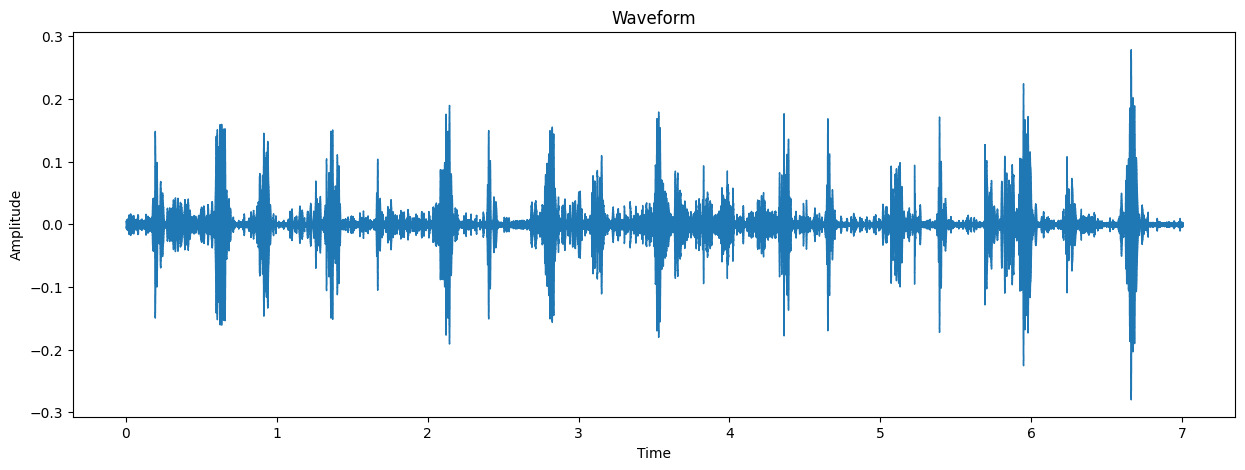

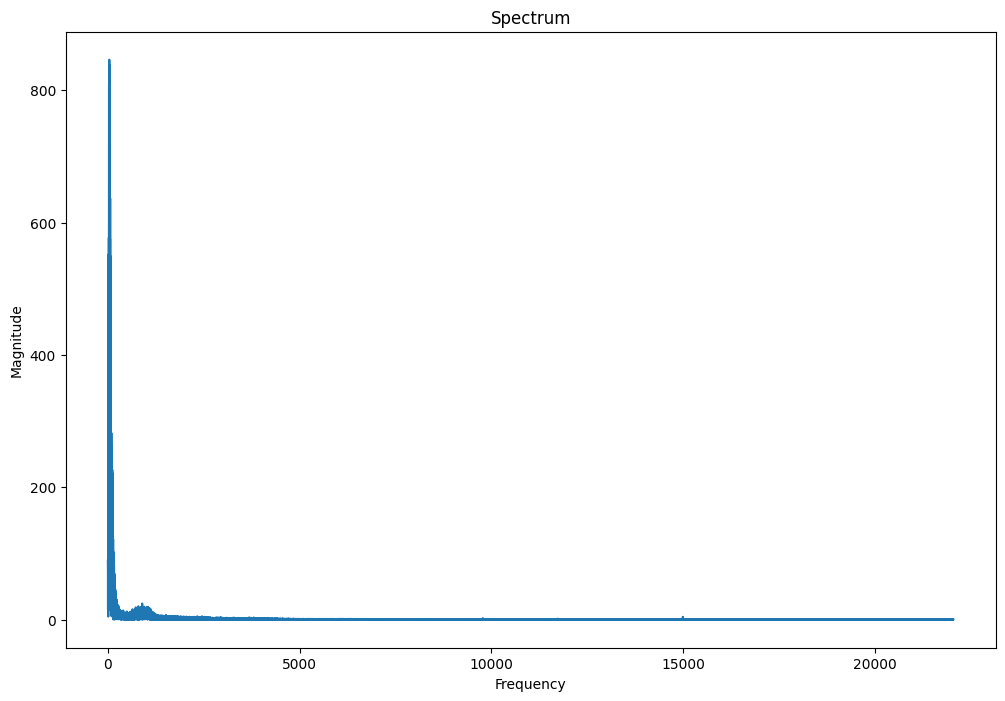

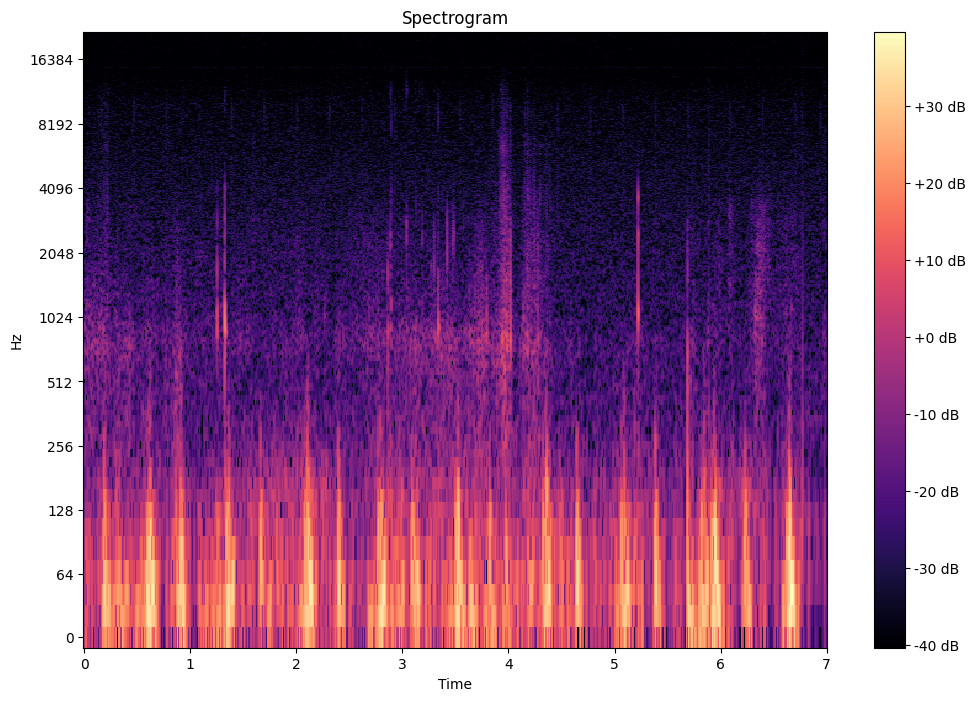

In [ ]:
show_audio_waveform(normal_sample, sr_sample)
show_audio_spectrum(normal_sample, sr_sample)
show_audio_spectrogram(normal_sample, sr_sample)

##Murmur:

In [ ]:
murmur_audio, murmur_sample, sr_sample = random_sound('Atraining_murmur')
murmur_audio

Atraining_murmur/Atraining_murmur_201108222227.wav


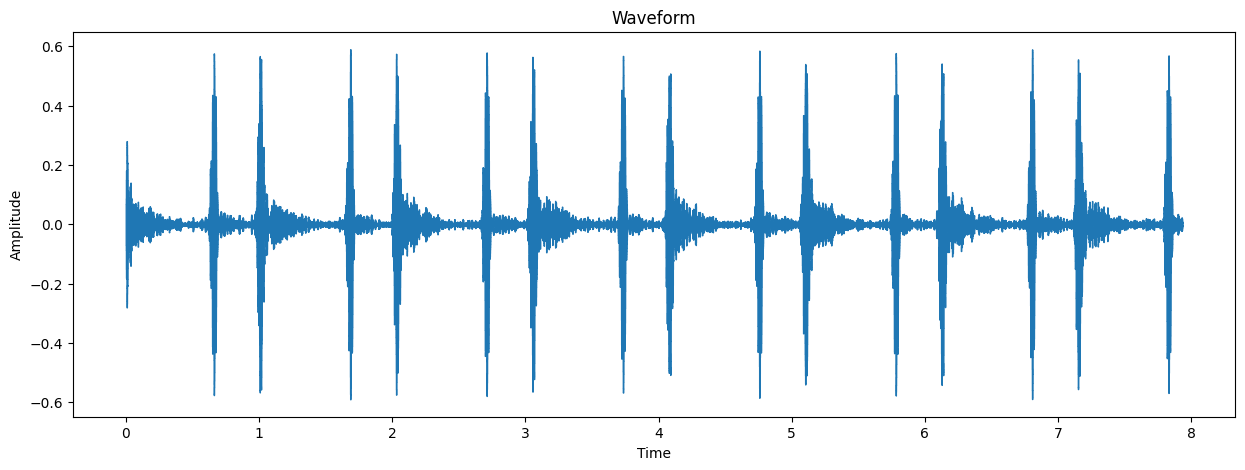

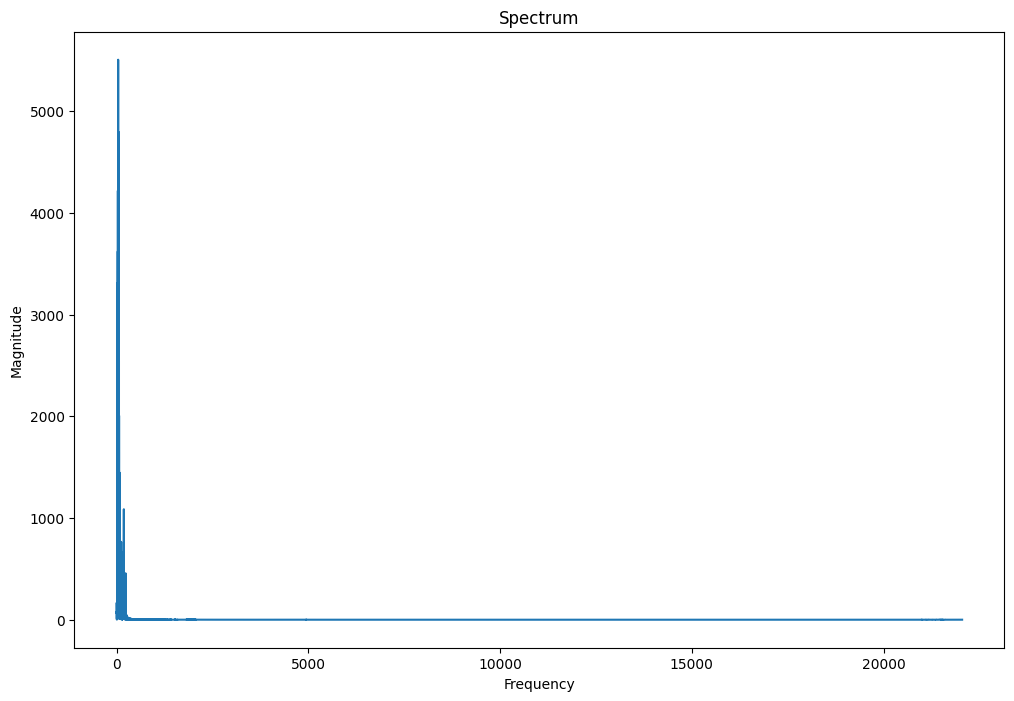

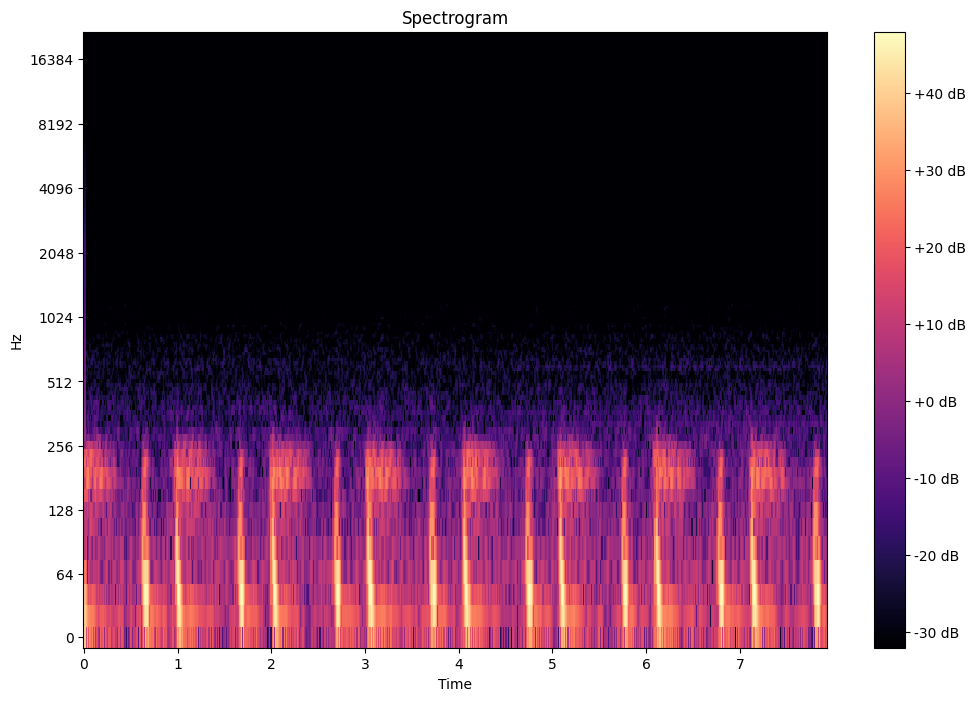

In [ ]:
show_audio_waveform(murmur_sample, sr_sample)
show_audio_spectrum(murmur_sample, sr_sample)
show_audio_spectrogram(murmur_sample, sr_sample)

## Extrahls:

In [ ]:
extrahls_audio, extrahls_sample, sr_sample = random_sound('Atraining_extrahs')
extrahls_audio

Atraining_extrahs/Atraining_extrahs_201102070251.wav


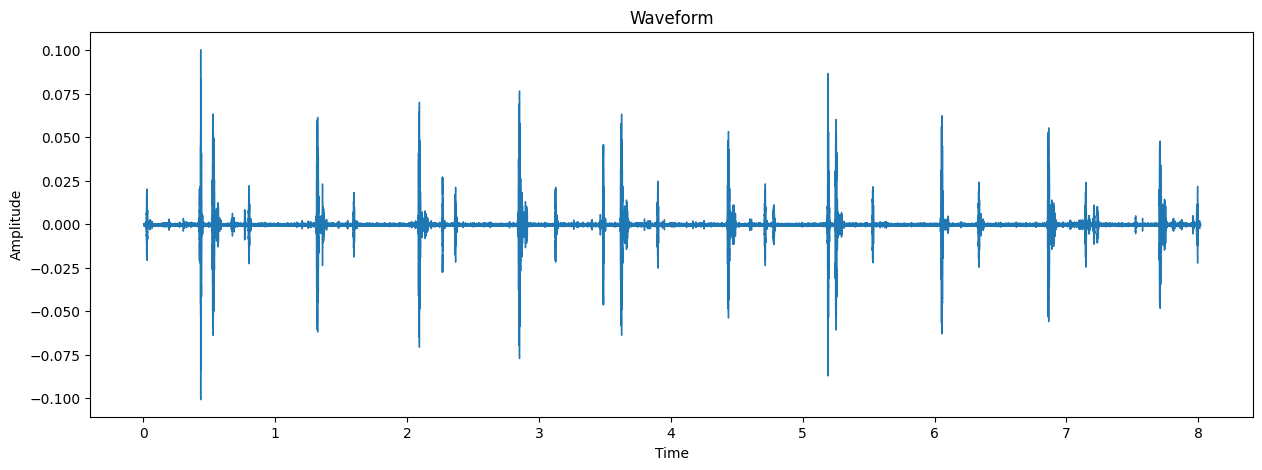

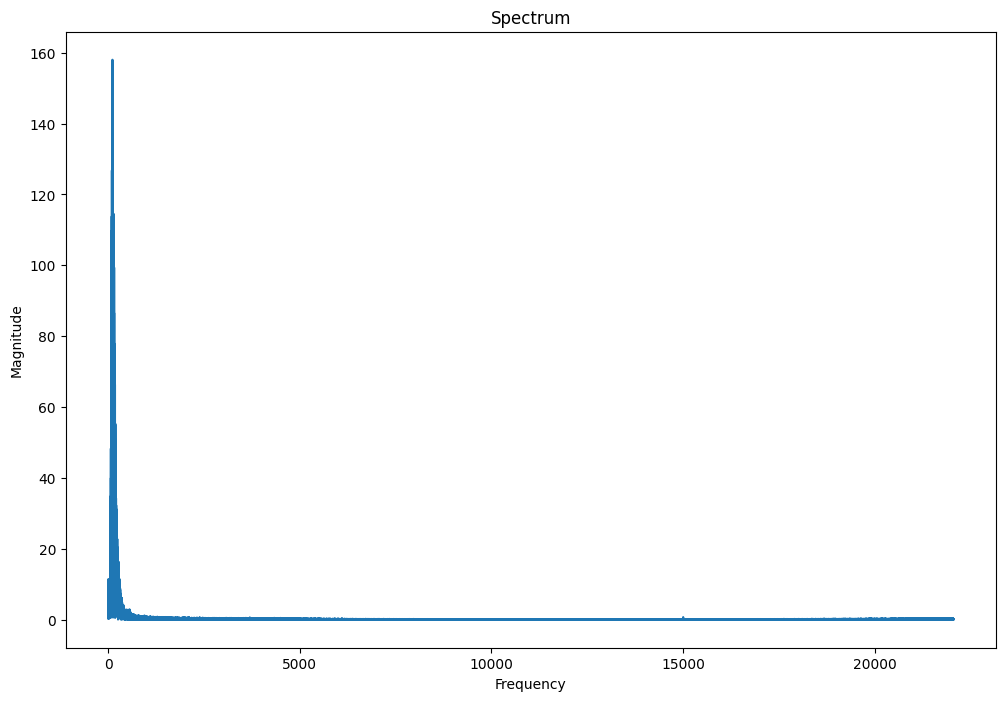

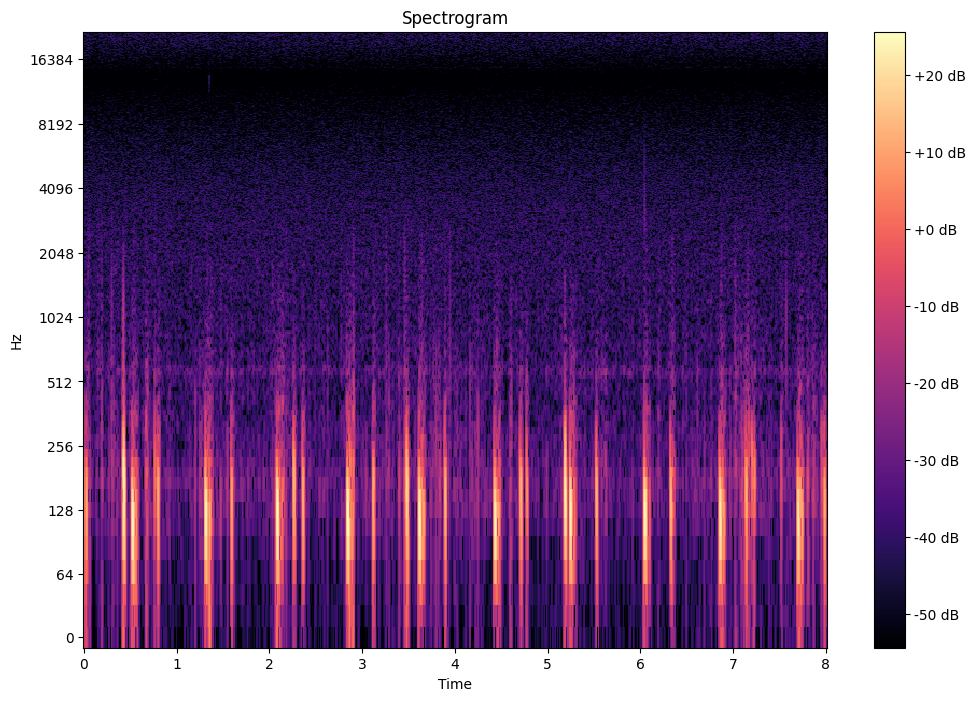

In [ ]:
show_audio_waveform(extrahls_sample, sr_sample)
show_audio_spectrum(extrahls_sample, sr_sample)
show_audio_spectrogram(extrahls_sample, sr_sample)

## Artifact:

In [ ]:
artifact_audio, artifact_sample, sr_sample = random_sound('Atraining_artifact')
artifact_audio

Atraining_artifact/Atraining_artifact_201106121242.wav


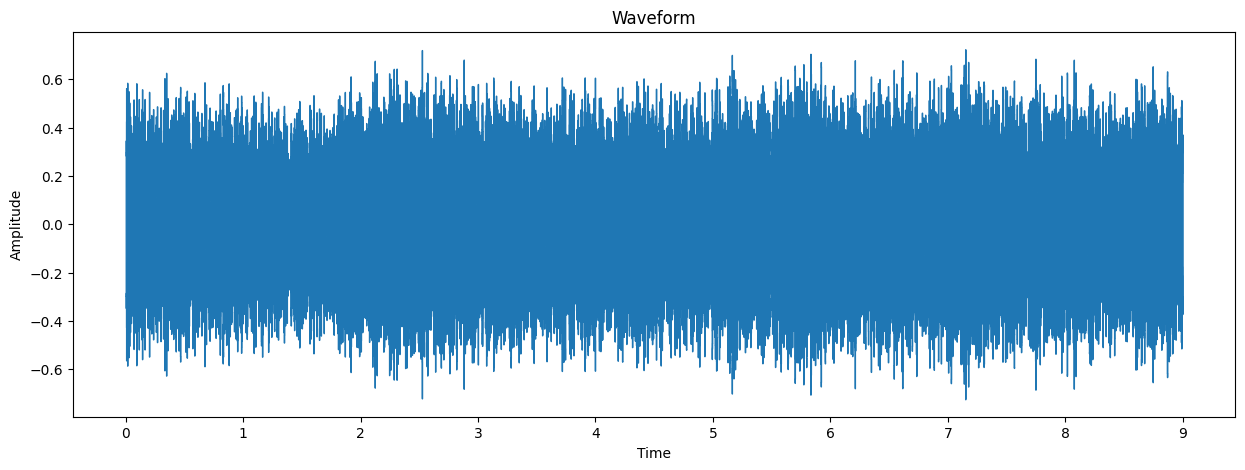

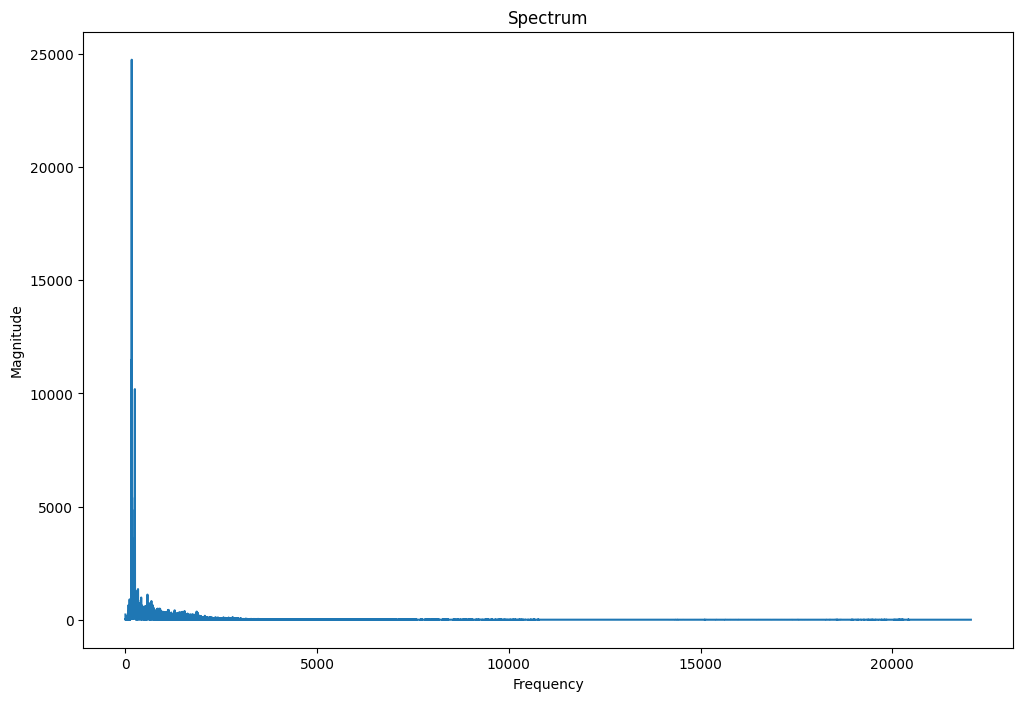

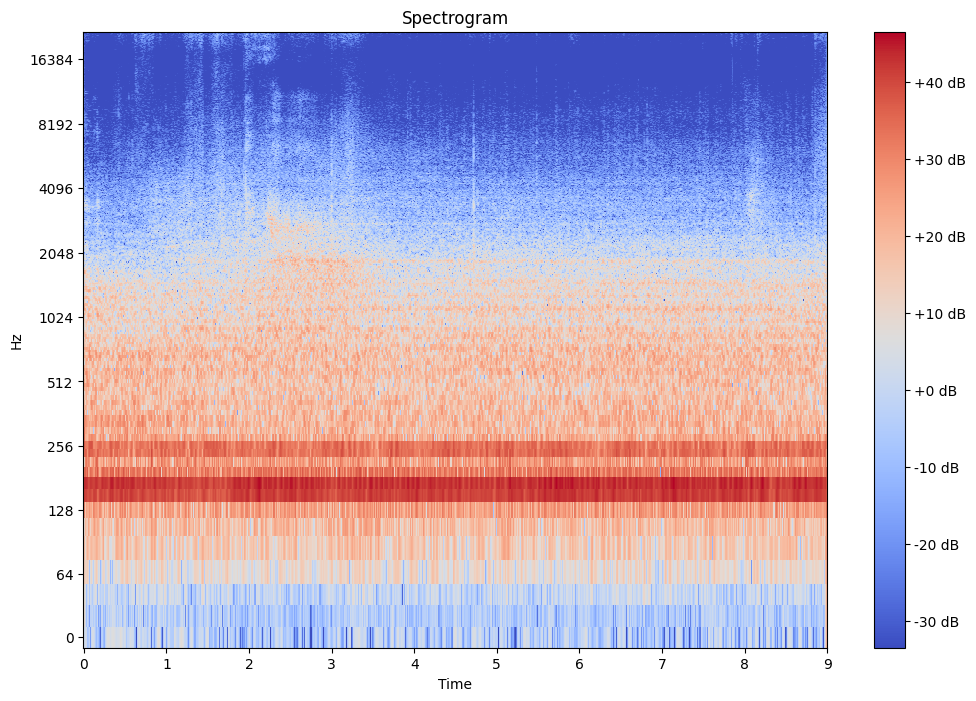

In [ ]:
show_audio_waveform(artifact_sample, sr_sample)
show_audio_spectrum(artifact_sample, sr_sample)
show_audio_spectrogram(artifact_sample, sr_sample)

## Extrastole:

In [ ]:
%cd '/content/drive/MyDrive/Project/DATA_2/set_B'

/content/drive/MyDrive/Project/DATA_2/set_B


In [ ]:
extrastole_audio, extrastole_sample, sr_sample = random_sound('Btraining_extrasystole')
extrastole_audio

Btraining_extrasystole/Btraining_extrasystole_265_1309367698923_C.wav


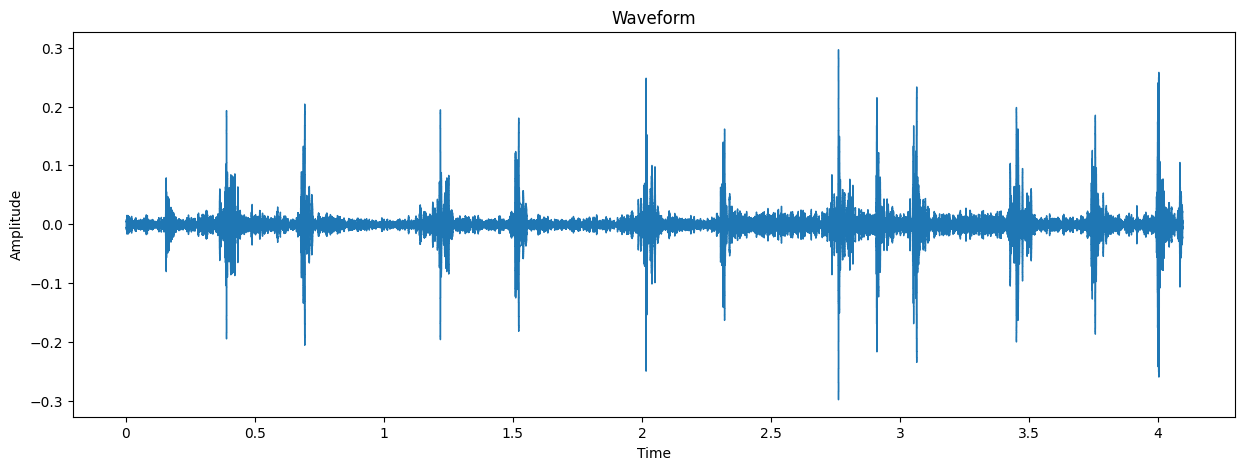

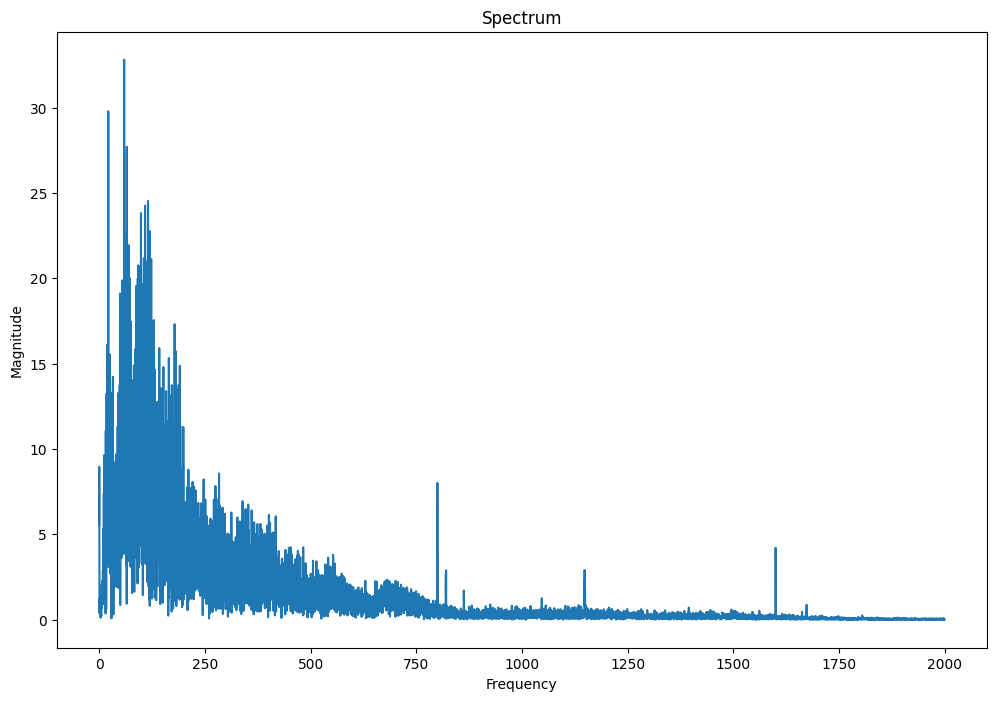

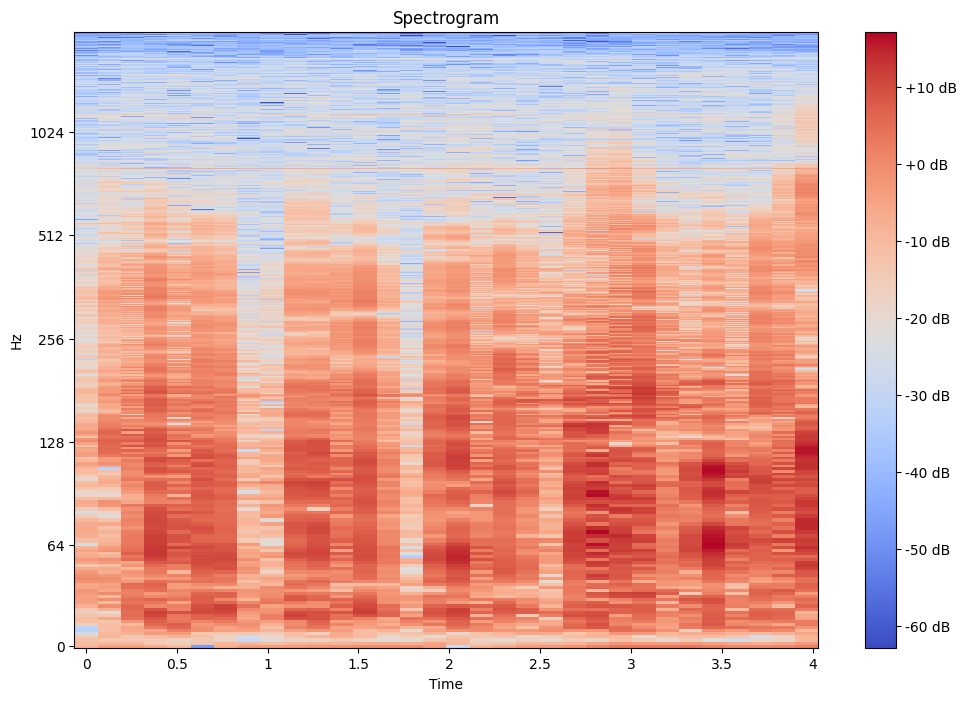

In [ ]:
show_audio_waveform(extrastole_sample, sr_sample)
show_audio_spectrum(extrastole_sample, sr_sample)
show_audio_spectrogram(extrastole_sample, sr_sample)